<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-three-.csv-files-into-three-Pandas-DataFrames:-transactions,-members-and-maus" data-toc-modified-id="Read-the-three-.csv-files-into-three-Pandas-DataFrames:-transactions,-members-and-maus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the three .csv files into three Pandas DataFrames: transactions, members and maus</a></span></li><li><span><a href="#Add-a-column-to-the-members-DataFrame-with-the-country’s-(ipAddressCountryCode)-income-level-using-this-API:-(https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries)" data-toc-modified-id="Add-a-column-to-the-members-DataFrame-with-the-country’s-(ipAddressCountryCode)-income-level-using-this-API:-(https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add a column to the members DataFrame with the country’s (ipAddressCountryCode) income level using this API: (<a href="https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries" target="_blank">https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries</a>)</a></span></li><li><span><a href="#Convert-members-(with-the-income-level-column),-transactions-and-maus-into-three-tables-in-an-empty-MySQL-database." data-toc-modified-id="Convert-members-(with-the-income-level-column),-transactions-and-maus-into-three-tables-in-an-empty-MySQL-database.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convert members (with the income level column), transactions and maus into three tables in an empty MySQL database.</a></span></li><li><span><a href="#Ensure-the-columns-are-VARCHAR,-INT-and-DATETIME-where-relevant" data-toc-modified-id="Ensure-the-columns-are-VARCHAR,-INT-and-DATETIME-where-relevant-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ensure the columns are VARCHAR, INT and DATETIME where relevant</a></span></li><li><span><a href="#Ensure-that-indexes-are-created-on-the-tables-to-enable-you-to-answer-the-following-questions-with-optimized-SQL-queries:" data-toc-modified-id="Ensure-that-indexes-are-created-on-the-tables-to-enable-you-to-answer-the-following-questions-with-optimized-SQL-queries:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ensure that indexes are created on the tables to enable you to answer the following questions with optimized SQL queries:</a></span><ul class="toc-item"><li><span><a href="#Which-device-has-a-larger-proportion-of-premium-members?" data-toc-modified-id="Which-device-has-a-larger-proportion-of-premium-members?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Which device has a larger proportion of premium members?</a></span></li><li><span><a href="#Which-Country-has-the-oldest-member-(dobYEAR)?" data-toc-modified-id="Which-Country-has-the-oldest-member-(dobYEAR)?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Country has the oldest member (dobYEAR)?</a></span></li><li><span><a href="#What-is-the-average-transaction-value-in-GBP-(Price)-per-country-income-level?" data-toc-modified-id="What-is-the-average-transaction-value-in-GBP-(Price)-per-country-income-level?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>What is the average transaction value in GBP (Price) per country income level?</a></span></li></ul></li><li><span><a href="#Answer-the-above-questions,-in-SQL-executed-from-Python" data-toc-modified-id="Answer-the-above-questions,-in-SQL-executed-from-Python-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Answer the above questions, in SQL executed from Python</a></span></li><li><span><a href="#In-Python-plot-the-number-of-members-by-last-click-(refSource)" data-toc-modified-id="In-Python-plot-the-number-of-members-by-last-click-(refSource)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>In Python plot the number of members by last click (refSource)</a></span></li><li><span><a href="#In-Python-plot-MAUs-by-gender" data-toc-modified-id="In-Python-plot-MAUs-by-gender-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>In Python plot MAUs by gender</a></span></li><li><span><a href="#Plot-MAUs-by-date" data-toc-modified-id="Plot-MAUs-by-date-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot MAUs by date</a></span></li><li><span><a href="#Plot-monthly-transactions-by-income-level" data-toc-modified-id="Plot-monthly-transactions-by-income-level-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Plot monthly transactions by income level</a></span></li><li><span><a href="#Create-a-model-to-predict-transactions,-that-could-be-used-to-get-real-business-value" data-toc-modified-id="Create-a-model-to-predict-transactions,-that-could-be-used-to-get-real-business-value-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Create a model to predict transactions, that could be used to get real business value</a></span></li><li><span><a href="#Describe-how-you-would-use-the-model" data-toc-modified-id="Describe-how-you-would-use-the-model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Describe how you would use the model</a></span></li></ul></div>

First, import all necessary libraries.

In [1]:
import pandas as pd
import requests
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import pymysql
import math
from sqlalchemy import exc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

# Read the three .csv files into three Pandas DataFrames: transactions, members and maus

In [2]:
transactions = pd.read_csv("transactions_sample.csv")
members = pd.read_csv("members_sample.csv")
maus = pd.read_csv("maus_sample.csv")

Let's do some exploratory data analysis:

In [3]:
transactions.head()

,id,memberID,productID,transactionID,price,boughtAt,deviceOS,appVersion,timestamp,localPrice,currencyCode
0,1,2116679,WEEKLY_PREMIUM_V2,600000471477193,0.00,2020-02-07 14:14:50.000000,iOS,7.0,2020-02-07 14:14:52.476820,19.99,USD
1,2,1022362,instant_match,hmjhjggchggpknchiiodejic.AO-J1OzRx7PFgC3e620Rh...,2.99,2019-01-23 22:26:46.000000,android,NaN,2019-01-23 22:26:55.006987,2.99,GBP
2,3,1022362,two_hundred_fifty_swipes,mffimkkfigioafjhofakimne.AO-J1OzHs7MJGb59GOfcP...,9.99,2019-01-23 22:44:09.000000,android,NaN,2019-01-23 22:44:16.473466,9.99,GBP
3,4,1022362,premium_older_1999_monthly,fhfaodcgfioelnkobndoonfg.AO-J1OyrkVtIFtD-t8fEi...,0.00,2019-01-23 23:21:02.000000,android,NaN,2019-01-23 23:21:08.761697,19.99,GBP
4,5,1022362,premium_older_1999_monthly,fhfaodcgfioelnkobndoonfg.AO-J1OyrkVtIFtD-t8fEi...,19.99,2019-01-23 23:21:02.000000,android,NaN,2019-01-31 02:00:21.000000,NaN,GBP


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43309 entries, 0 to 43308
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             43309 non-null  int64  
 1   memberID       43309 non-null  int64  
 2   productID      43294 non-null  object 
 3   transactionID  43309 non-null  object 
 4   price          43294 non-null  float64
 5   boughtAt       43150 non-null  object 
 6   deviceOS       43309 non-null  object 
 7   appVersion     15210 non-null  float64
 8   timestamp      43309 non-null  object 
 9   localPrice     37235 non-null  float64
 10  currencyCode   42481 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.6+ MB


In [5]:
members.head()

,memberID,deviceOS,gender,dobYEAR,ipAddressCountryCode,maritalStatus,premium,refMedium,refSource,refCampaign,timestampRegistered
0,875932,iOS,F,1992.0,GB,S,0,organic,store,NaN,2018-11-27 13:10:25.599166
1,2116679,iOS,F,1998.0,US,S,1,non-organic,snap,Snap | Testimonials | US,2020-02-07 14:10:21.000000
2,1821352,android,M,1997.0,BD,S,0,non-organic,google adwords,Google - UAC3 - US Android (INSTALL),2019-11-21 05:27:00.310387
3,618051,iOS,F,1991.0,GB,S,0,organic,store,NaN,2018-08-16 18:52:44.672780
4,491058,android,F,1989.0,GB,NaN,0,organic,google-play,NaN,2018-05-27 10:19:08.284888


In [6]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113972 entries, 0 to 113971
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   memberID              113972 non-null  int64  
 1   deviceOS              113972 non-null  object 
 2   gender                113972 non-null  object 
 3   dobYEAR               113588 non-null  float64
 4   ipAddressCountryCode  101013 non-null  object 
 5   maritalStatus         78404 non-null   object 
 6   premium               113972 non-null  int64  
 7   refMedium             113323 non-null  object 
 8   refSource             99843 non-null   object 
 9   refCampaign           37976 non-null   object 
 10  timestampRegistered   113972 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 9.6+ MB


In [7]:
maus.head()

,id,startDate,endDate,valueType,memberID,timestamp
0,1,2018-11-01 00:00:00,2018-12-01 00:00:00,MAU,875932,2018-12-01 01:59:19
1,2,2019-03-01 00:00:00,2019-04-01 00:00:00,MAU,875932,2019-03-29 01:30:27
2,3,2020-02-01 00:00:00,2020-03-01 00:00:00,MAU,2116679,2020-03-01 03:57:58
3,4,2019-11-01 00:00:00,2019-12-01 00:00:00,MAU,1821352,2019-12-06 05:42:46
4,5,2018-08-01 00:00:00,2018-09-01 00:00:00,MAU,618051,2018-09-01 00:21:50


In [8]:
maus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362553 entries, 0 to 362552
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         362553 non-null  int64 
 1   startDate  362553 non-null  object
 2   endDate    362553 non-null  object
 3   valueType  362553 non-null  object
 4   memberID   362553 non-null  int64 
 5   timestamp  362553 non-null  object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


Convert all columns which are date and times to type datetime

In [9]:
transactions.boughtAt = pd.to_datetime(
    transactions.boughtAt, infer_datetime_format=True)
transactions.timestamp = pd.to_datetime(
    transactions.timestamp, infer_datetime_format=True)

members.timestampRegistered = pd.to_datetime(
    members.timestampRegistered, infer_datetime_format=True)

maus.startDate = pd.to_datetime(maus.startDate, infer_datetime_format=True)
maus.endDate = pd.to_datetime(maus.endDate, infer_datetime_format=True)
maus.timestamp = pd.to_datetime(maus.timestamp, infer_datetime_format=True)

# Add a column to the members DataFrame with the country’s (ipAddressCountryCode) income level using this API: (https://datahelpdesk.worldbank.org/knowledgebase/articles/898590-country-api-queries)

Create a dictionary with the income levels of all unique countries present in the members dataframe, which will be used to create the new column

In [10]:
countryIncome = {}
for country in members['ipAddressCountryCode'].unique():
    if type(country) != str:
        countryIncome[country] = country
        continue
    url = 'http://api.worldbank.org/v2/country/{}?format=json'.format(country)
    result = requests.get(url).json()
    try:
        income = result[1][0]['incomeLevel']['value']
    except:
        income = math.nan()
    countryIncome[country] = income

And here is the dictionary:

In [11]:
countryIncome

{'GB': 'High income',
 'US': 'High income',
 'BD': 'Lower middle income',
 'NG': 'Lower middle income',
 nan: nan,
 'FR': 'High income',
 'CA': 'High income',
 'NL': 'High income',
 'DJ': 'Lower middle income',
 'MA': 'Lower middle income',
 'ID': 'Upper middle income',
 'SG': 'High income',
 'PK': 'Lower middle income',
 'IN': 'Lower middle income',
 'SE': 'High income',
 'BH': 'High income',
 'AU': 'High income',
 'AE': 'High income',
 'DE': 'High income',
 'ZM': 'Lower middle income',
 'TR': 'Upper middle income',
 'EG': 'Lower middle income',
 'IL': 'High income',
 'SA': 'High income',
 'BN': 'High income',
 'CI': 'Lower middle income',
 'MY': 'Upper middle income',
 'RU': 'Upper middle income',
 'TN': 'Lower middle income',
 'KZ': 'Upper middle income',
 'AL': 'Upper middle income',
 'VN': 'Lower middle income',
 'DZ': 'Lower middle income',
 'SD': 'Low income',
 'LK': 'Lower middle income',
 'RS': 'Upper middle income',
 'IT': 'High income',
 'NZ': 'High income',
 'JO': 'Upper mi

Now use the dictionary to create the new column

In [12]:
incomeLevel = [countryIncome[country]
               for country in members['ipAddressCountryCode']]
members['incomeLevel'] = incomeLevel

Let's see if everything is OK...

In [13]:
members.head()

,memberID,deviceOS,gender,dobYEAR,ipAddressCountryCode,maritalStatus,premium,refMedium,refSource,refCampaign,timestampRegistered,incomeLevel
0,875932,iOS,F,1992.0,GB,S,0,organic,store,NaN,2018-11-27 13:10:25.599166,High income
1,2116679,iOS,F,1998.0,US,S,1,non-organic,snap,Snap | Testimonials | US,2020-02-07 14:10:21.000000,High income
2,1821352,android,M,1997.0,BD,S,0,non-organic,google adwords,Google - UAC3 - US Android (INSTALL),2019-11-21 05:27:00.310387,Lower middle income
3,618051,iOS,F,1991.0,GB,S,0,organic,store,NaN,2018-08-16 18:52:44.672780,High income
4,491058,android,F,1989.0,GB,NaN,0,organic,google-play,NaN,2018-05-27 10:19:08.284888,High income


In [14]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113972 entries, 0 to 113971
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   memberID              113972 non-null  int64         
 1   deviceOS              113972 non-null  object        
 2   gender                113972 non-null  object        
 3   dobYEAR               113588 non-null  float64       
 4   ipAddressCountryCode  101013 non-null  object        
 5   maritalStatus         78404 non-null   object        
 6   premium               113972 non-null  int64         
 7   refMedium             113323 non-null  object        
 8   refSource             99843 non-null   object        
 9   refCampaign           37976 non-null   object        
 10  timestampRegistered   113972 non-null  datetime64[ns]
 11  incomeLevel           101013 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memo

Look good.

# Convert members (with the income level column), transactions and maus into three tables in an empty MySQL database.

Create functions to create MySQL database and tables

In [15]:
def createMysqlDatabase(dataBase):
    engine = create_engine(
        'mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)

    dbConnection = engine.connect()

    try:
        engine.execute("CREATE DATABASE " + dataBase)
    except exc.SQLAlchemyError as ex:
        if str(ex).find('1007') != -1:
            print("Can't create database " + dataBase + "; database exists")
    else:
        print("Database %s created successfully." % dataBase)
    finally:
        dbConnection.close()

Create MySQL database "data_test"

In [16]:
createMysqlDatabase("data_test")

Database data_test created successfully.


In [17]:
def pandas2mysql(dataFrame, tableName, dataBase):

    engine = create_engine(
        'mysql+pymysql://root:@127.0.0.1/'+dataBase, pool_recycle=3600)

    dbConnection = engine.connect()

    dtypes_dict = {}

    for column in dataFrame.columns:
        if (dataFrame[column].dtypes == np.int64):
            dtypes_dict[column] = sqlalchemy.types.INTEGER()
        elif (dataFrame[column].dtypes == object):
            dtypes_dict[column] = sqlalchemy.types.VARCHAR(length=255)
        elif (pd.api.types.is_datetime64_ns_dtype(dataFrame[column])):
            dtypes_dict[column] = sqlalchemy.DateTime()
        elif (dataFrame[column].dtypes == np.float64):
            dtypes_dict[column] = sqlalchemy.types.FLOAT()

    try:
        frame = dataFrame.to_sql(tableName, dbConnection, if_exists='fail',
                                 dtype=dtypes_dict)
    except ValueError as vx:
        print(vx)
    except Exception as ex:
        print(ex)
    else:
        print("Table %s created successfully." % tableName)
    finally:
        dbConnection.close()

Create tables

In [18]:
pandas2mysql(transactions, "transactions", "data_test")
pandas2mysql(members, "members", "data_test")
pandas2mysql(maus, "maus", "data_test")

Table transactions created successfully.
Table members created successfully.
Table maus created successfully.


# Ensure the columns are VARCHAR, INT and DATETIME where relevant

# Ensure that indexes are created on the tables to enable you to answer the following questions with optimized SQL queries:

In [19]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("DESCRIBE transactions")
    for item in result:
        print(item)
    print()
    result = engine.execute("DESCRIBE members")
    for item in result:
        print(item)
    print()
    result = engine.execute("DESCRIBE maus")
    for item in result:
        print(item)
except exc.SQLAlchemyError as ex:
    print(ex)

('index', 'bigint', 'YES', 'MUL', None, '')
('id', 'int', 'YES', '', None, '')
('memberID', 'int', 'YES', '', None, '')
('productID', 'varchar(255)', 'YES', '', None, '')
('transactionID', 'varchar(255)', 'YES', '', None, '')
('price', 'float', 'YES', '', None, '')
('boughtAt', 'datetime', 'YES', '', None, '')
('deviceOS', 'varchar(255)', 'YES', '', None, '')
('appVersion', 'float', 'YES', '', None, '')
('timestamp', 'datetime', 'YES', '', None, '')
('localPrice', 'float', 'YES', '', None, '')
('currencyCode', 'varchar(255)', 'YES', '', None, '')

('index', 'bigint', 'YES', 'MUL', None, '')
('memberID', 'int', 'YES', '', None, '')
('deviceOS', 'varchar(255)', 'YES', '', None, '')
('gender', 'varchar(255)', 'YES', '', None, '')
('dobYEAR', 'float', 'YES', '', None, '')
('ipAddressCountryCode', 'varchar(255)', 'YES', '', None, '')
('maritalStatus', 'varchar(255)', 'YES', '', None, '')
('premium', 'int', 'YES', '', None, '')
('refMedium', 'varchar(255)', 'YES', '', None, '')
('refSource',

Data types in the MySQL tables are as expected. And we have the necessary indexes.

Now I will answer the questions of item 5, using SQL executed here, in Python

## Which device has a larger proportion of premium members?

(There are no columns named 'device' in any of the 3 tables. I will assume 'deviceOS' is the correct column)

In [20]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT (SUM(premium)/COUNT(premium)), deviceOS
        FROM members
        GROUP BY deviceOS;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [21]:
for item in result:
    print(item)

(Decimal('0.0252'), 'iOS')
(Decimal('0.0142'), 'android')


So iOS devices have the larger proportion of premium users (2.52 %). Only 1.42 % of the Android devices have premium users.

## Which Country has the oldest member (dobYEAR)?

In [22]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT distinct ipAddressCountryCode, dobYEAR
        FROM members
        WHERE dobYEAR = (SELECT MIN(dobYEAR) FROM members)
        ORDER BY ipAddressCountryCode;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [23]:
for item in result:
    print(item)

('MA', 1903.0)
('NO', 1903.0)
('US', 1903.0)


Marocco, Norway and the United States have 117-year-old members.

## What is the average transaction value in GBP (Price) per country income level?

In [24]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT CAST(AVG(trans.price) AS DECIMAL(10,2)), members.incomeLevel  
        FROM (SELECT price, memberID FROM transactions WHERE currencyCode = "GBP") as trans 
        INNER JOIN members
        ON members.memberID = trans.memberID
        GROUP BY members.incomeLevel;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [25]:
for item in result:
    print(item)

(Decimal('8.80'), 'High income')
(Decimal('5.57'), 'Lower middle income')
(Decimal('8.82'), 'Upper middle income')
(Decimal('4.16'), None)
(Decimal('59.99'), 'Low income')


"None" represent the countries for which the World Bank API did not return an income level.


# Answer the above questions, in SQL executed from Python

See section 5!

# In Python plot the number of members by last click (refSource)

First we get the data, using SQL through Python

In [26]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT COUNT(1), refSource
        FROM members
        GROUP BY refSource;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [27]:
result_dict = {}
for item in result:
    if item[1] == None:
        continue
    result_dict[item[0]] = item[1]

Then we plot the data

In [28]:
hist_data = []
for k, v in result_dict.items():
    hist_data.append((k, v))
hist_data.sort(key=lambda tup: -tup[0])

As there is a large discrepancy between the highest and the lowest counts, I will create a bar plot displaying the log10 of the counts.

In [29]:
count = []
source = []
for data in hist_data:
    count.append(math.log10(data[0]))
    source.append(data[1])

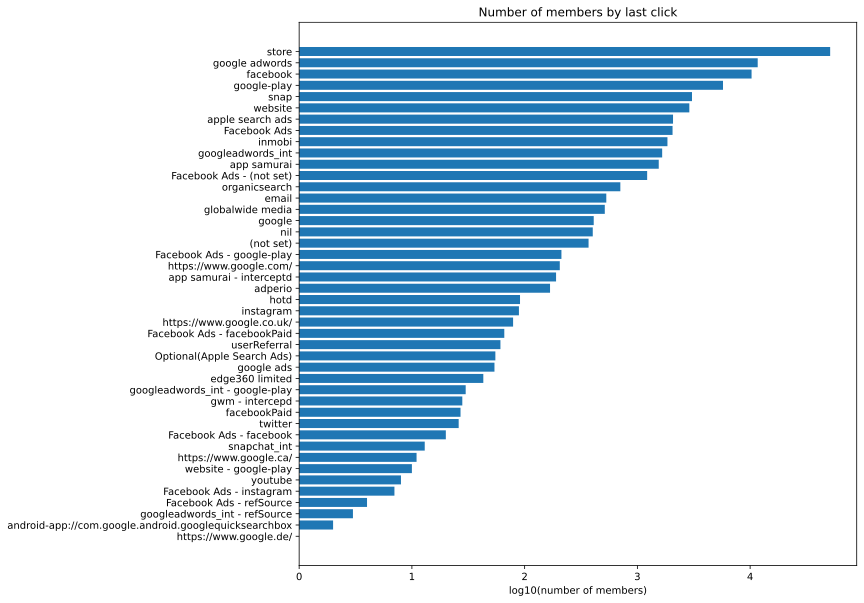

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10, 10))

ax.barh(source, count, align='center')
ax.invert_yaxis()
ax.set_xlabel('log10(number of members)')
ax.set_title('Number of members by last click')

plt.show()

# In Python plot MAUs by gender

First get the data

In [31]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT COUNT(1), members.gender
        FROM members
        INNER JOIN maus
        ON maus.memberID = members.memberID
        GROUP BY members.gender;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [32]:
gender = []
count = []
for item in result:
    gender.append(item[1])
    count.append(item[0])

Then plot it

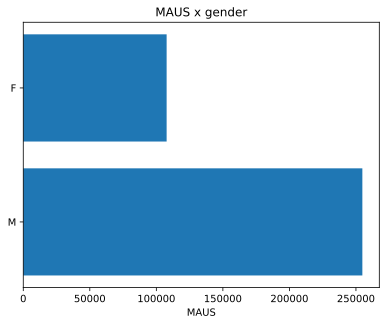

In [33]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(gender, count, align='center')
ax.invert_yaxis()
ax.set_xlabel('MAUS')
ax.set_title('MAUS x gender')

plt.show()

# Plot MAUs by date

As usual, first we get the data...

In [34]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT timestamp
        FROM maus
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

This time we will convert the sqlalchemy.engine.result to a pandas Dataframe

In [35]:
df = pd.DataFrame(result.fetchall())
df.columns = result.keys()

In [36]:
df.head()

,timestamp
0,2018-12-01 01:59:19
1,2019-03-29 01:30:27
2,2020-03-01 03:57:58
3,2019-12-06 05:42:46
4,2018-09-01 00:21:50


Looks good. Now let's plot it.

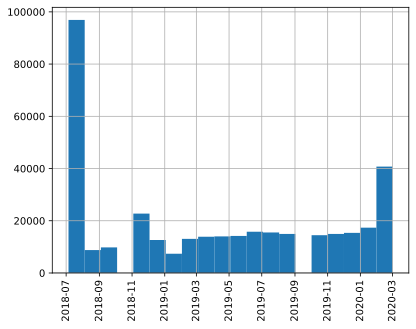

In [37]:
p = df['timestamp'].hist(bins=20)
plt.xticks(rotation='vertical')
plt.show()

# Plot monthly transactions by income level

Data...

In [38]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT COUNT(1), members.incomeLevel
        FROM members
        INNER JOIN transactions
        ON transactions.memberID = members.memberID
        GROUP BY members.incomeLevel;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [39]:
count = []
incomeLevel = []
for item in result:
    if item[1] == None:
        continue
    count.append(math.log10(item[0]))
    incomeLevel.append(item[1])

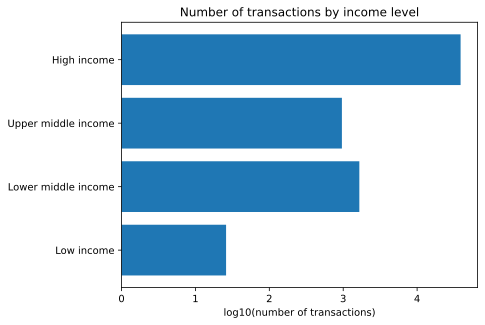

In [40]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(incomeLevel, count, align='center')
ax.invert_yaxis()
ax.set_xlabel('log10(number of transactions)')
ax.set_title('Number of transactions by income level')

plt.show()

# Create a model to predict transactions, that could be used to get real business value

I will create a temporary table containing the number of transactions per member, and then LEFT OUTER JOIN the members table with this one. This way I analyse possible correlations between number of transactions and other members features.

In [41]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        CREATE TABLE temp
        AS (SELECT COUNT(1) AS numTransactions, memberID
        FROM transactions
        GROUP BY memberID);
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

In [42]:
engine = create_engine(
    'mysql+pymysql://root:@127.0.0.1/data_test', pool_recycle=3600)

dbConnection = engine.connect()

try:
    result = engine.execute("""
        SELECT members.*, numTransactions 
        FROM members
        LEFT OUTER JOIN temp
        ON members.memberID = temp.memberID;
    """)
except exc.SQLAlchemyError as ex:
    print(ex)

I have obtained my data using SQL queries on a MySQL database. But let's convert the result into a pandas DataFram, which makes analysis easier.

In [43]:
df = pd.DataFrame(result.fetchall())
df.columns = result.keys()

In [44]:
df.head()

,index,memberID,deviceOS,gender,dobYEAR,ipAddressCountryCode,maritalStatus,premium,refMedium,refSource,refCampaign,timestampRegistered,incomeLevel,numTransactions
0,1,2116679,iOS,F,1998.0,US,S,1,non-organic,snap,Snap | Testimonials | US,2020-02-07 14:10:21,High income,1.0
1,7,1022362,android,F,1994.0,GB,S,1,non-organic,google adwords,Google UAC - UK - Android,2019-01-23 21:57:33,High income,5.0
2,20,1692305,android,F,1982.0,ID,S,0,organic,store,None,2019-09-26 15:41:22,Upper middle income,4.0
3,30,1806718,iOS,M,1988.0,BH,S,1,organic,store,None,2019-11-14 18:09:41,High income,1.0
4,36,605152,android,M,1983.0,GB,D,1,non-organic,Facebook Ads - (not set),FB - Android 2,2018-08-09 18:28:47,High income,11.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113972 entries, 0 to 113971
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   index                 113972 non-null  int64         
 1   memberID              113972 non-null  int64         
 2   deviceOS              113972 non-null  object        
 3   gender                113972 non-null  object        
 4   dobYEAR               113588 non-null  float64       
 5   ipAddressCountryCode  101013 non-null  object        
 6   maritalStatus         78404 non-null   object        
 7   premium               113972 non-null  int64         
 8   refMedium             113323 non-null  object        
 9   refSource             99843 non-null   object        
 10  refCampaign           37976 non-null   object        
 11  timestampRegistered   113972 non-null  datetime64[ns]
 12  incomeLevel           101013 non-null  object        
 13 

I will create lists with all my selected features and those that are categorical.
I have not taken into consideration 'index', 'memberID' and 'timestampRegistered' because of an obvious reason: they are mere indices. Columns 'refMedium', 'refSource' and 'refCampaign' *might* be useful, but will be left out for the sake of simplicity. Finally, column 'premium' must not be taken into consideration because of causality: if someone is a premium member, it is obvious that he has transacted. Thís column is a bad 'predictor' about the probability that this member will transact or not.

In [46]:
feature_index = ['deviceOS', 'gender', 'dobYEAR', 'ipAddressCountryCode', 'maritalStatus', 'incomeLevel']
categorical_features = ['deviceOS', 'gender', 'ipAddressCountryCode', 'maritalStatus', 'incomeLevel']

Since this is a quick analysis, I will just drop all rows in which one of my selected features is NaN.

In [47]:
df = df.dropna(subset = ['dobYEAR', 'ipAddressCountryCode', 'maritalStatus', 'incomeLevel'])

In [48]:
df.head()

,index,memberID,deviceOS,gender,dobYEAR,ipAddressCountryCode,maritalStatus,premium,refMedium,refSource,refCampaign,timestampRegistered,incomeLevel,numTransactions
0,1,2116679,iOS,F,1998.0,US,S,1,non-organic,snap,Snap | Testimonials | US,2020-02-07 14:10:21,High income,1.0
1,7,1022362,android,F,1994.0,GB,S,1,non-organic,google adwords,Google UAC - UK - Android,2019-01-23 21:57:33,High income,5.0
2,20,1692305,android,F,1982.0,ID,S,0,organic,store,None,2019-09-26 15:41:22,Upper middle income,4.0
3,30,1806718,iOS,M,1988.0,BH,S,1,organic,store,None,2019-11-14 18:09:41,High income,1.0
4,36,605152,android,M,1983.0,GB,D,1,non-organic,Facebook Ads - (not set),FB - Android 2,2018-08-09 18:28:47,High income,11.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68840 entries, 0 to 113971
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 68840 non-null  int64         
 1   memberID              68840 non-null  int64         
 2   deviceOS              68840 non-null  object        
 3   gender                68840 non-null  object        
 4   dobYEAR               68840 non-null  float64       
 5   ipAddressCountryCode  68840 non-null  object        
 6   maritalStatus         68840 non-null  object        
 7   premium               68840 non-null  int64         
 8   refMedium             68538 non-null  object        
 9   refSource             66027 non-null  object        
 10  refCampaign           22181 non-null  object        
 11  timestampRegistered   68840 non-null  datetime64[ns]
 12  incomeLevel           68840 non-null  object        
 13  numTransactions

The database is very badly balanced: there are many more members who have not transacted (numTransactions = NaN) then those who have. This will mess up our model's accuracy analysis. So I will remove a number of rows selected randomly among only those who have not transacted, in a way that we are left with a equal number of outcomes (9369 members who transacted and 9369 members who have not, for a total of 18738).

In [50]:
nanEntries = df[pd.isnull(df['numTransactions'])].index.tolist()
numSamples = int(2 * len(nanEntries) - df.shape[0])
dropIndices = np.random.choice(nanEntries, size = numSamples, replace=False)
df.drop(index = dropIndices, inplace=True)

In [51]:
df.head()

,index,memberID,deviceOS,gender,dobYEAR,ipAddressCountryCode,maritalStatus,premium,refMedium,refSource,refCampaign,timestampRegistered,incomeLevel,numTransactions
0,1,2116679,iOS,F,1998.0,US,S,1,non-organic,snap,Snap | Testimonials | US,2020-02-07 14:10:21,High income,1.0
1,7,1022362,android,F,1994.0,GB,S,1,non-organic,google adwords,Google UAC - UK - Android,2019-01-23 21:57:33,High income,5.0
2,20,1692305,android,F,1982.0,ID,S,0,organic,store,None,2019-09-26 15:41:22,Upper middle income,4.0
3,30,1806718,iOS,M,1988.0,BH,S,1,organic,store,None,2019-11-14 18:09:41,High income,1.0
4,36,605152,android,M,1983.0,GB,D,1,non-organic,Facebook Ads - (not set),FB - Android 2,2018-08-09 18:28:47,High income,11.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18738 entries, 0 to 113956
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 18738 non-null  int64         
 1   memberID              18738 non-null  int64         
 2   deviceOS              18738 non-null  object        
 3   gender                18738 non-null  object        
 4   dobYEAR               18738 non-null  float64       
 5   ipAddressCountryCode  18738 non-null  object        
 6   maritalStatus         18738 non-null  object        
 7   premium               18738 non-null  int64         
 8   refMedium             18658 non-null  object        
 9   refSource             17676 non-null  object        
 10  refCampaign           5477 non-null   object        
 11  timestampRegistered   18738 non-null  datetime64[ns]
 12  incomeLevel           18738 non-null  object        
 13  numTransactions

Looks good. We have 18378 rows, as intended.

Now I will put 0 in numTransactions when it is NaN

In [53]:
df['numTransactions'] = df['numTransactions'].fillna(0)

I will create only one new column, which I intend to use as my dependent variable: I will add a column that contains 1 if numTransactions > 0 and 0 otherwise

In [54]:
hasTransacted = [1 if item else 0 for item in df.numTransactions != 0]

In [55]:
df['hasTransacted'] = hasTransacted

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18738 entries, 0 to 113956
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 18738 non-null  int64         
 1   memberID              18738 non-null  int64         
 2   deviceOS              18738 non-null  object        
 3   gender                18738 non-null  object        
 4   dobYEAR               18738 non-null  float64       
 5   ipAddressCountryCode  18738 non-null  object        
 6   maritalStatus         18738 non-null  object        
 7   premium               18738 non-null  int64         
 8   refMedium             18658 non-null  object        
 9   refSource             17676 non-null  object        
 10  refCampaign           5477 non-null   object        
 11  timestampRegistered   18738 non-null  datetime64[ns]
 12  incomeLevel           18738 non-null  object        
 13  numTransactions

I will create an array with my features and then do some preprocessing

In [57]:
X = df[feature_index].values

I will label-encode my categorical features.

In [58]:
encoder = []
for feature in categorical_features:
    encoder.append(preprocessing.LabelEncoder())
    encoder[-1].fit(list(df[feature].unique()))
    X[:, feature_index.index(feature)] = encoder[-1].transform(X[:, feature_index.index(feature)]) 

Let's take a look at the feature array X

In [59]:
X

array([[1, 0, 1998.0, 122, 2, 0],
       [0, 0, 1994.0, 41, 2, 0],
       [0, 0, 1982.0, 52, 2, 3],
       ...,
       [0, 1, 1995.0, 122, 2, 0],
       [0, 1, 1987.0, 52, 1, 3],
       [1, 0, 1993.0, 41, 2, 0]], dtype=object)

X looks good! Now let's create a vector y with the results

In [60]:
y = df["hasTransacted"]

Separate 30 % of the data for testing and 70 % for training the model

In [61]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Now for the model. I will use a Random Forest Classifier

In [62]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)
predForest = clf.predict(X_testset)

In [63]:
print("RandomForest's Accuracy: ", metrics.accuracy_score(y_testset, predForest))

RandomForest's Accuracy:  0.7420846673781573


74 % accuracy! Not bad, for a model created so quickly... It's significantly more accurate than choosing by chance (50 %).

As a last step, let's do a little more detailed error analysis, through a confusion matrix

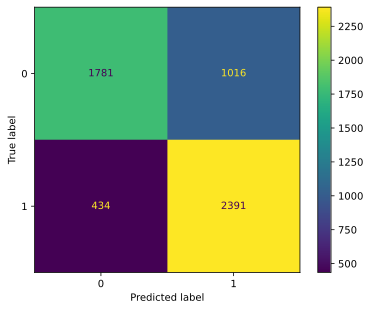

In [64]:
metrics.plot_confusion_matrix(clf, X_testset, y_testset)
plt.show()

Remember that we have '0' = 'did **NOT** transact' and '1' = '**DID** transact'.

Here are some statistics, as a percentage of the total test sample (= 5622 rows):

    
TRUE POSITIVE  = 2391 / 5622 = 0.426

FALSE POSITIVE =  1016 / 5622 = 0.181

TRUE NEGATIVE  = 1781 / 5622 = 0.316

FALSE NEGATIVE =  434 / 5622 = 0.077

PRECISION = 0.702

RECALL = 0.846

# Describe how you would use the model

The 'recall' (also known as 'sensitivity', 'hit rate', or 'true positive rate') measures the proportion of positives that are correctly identified. This means that if our model predicts that a transaction will occur, it is ~ 85 % probable that it will really occur. This is a very high value.

So this model could be used to analyse a database of people who are not yet members, to determine if they would or not transact, should they become members.

This may be used to guide the marketing department into targeting people who are more likely to spend money if they become members, and the marketing budget would be more efficiently employed.